Before we begin...

Questions:
* How has Covid influenced people?
 * i.e. are people being introspective, working on themselves, etc. or is something else going on?

In [94]:
import pandas as pd
import numpy as np
import sklearn as sk

In [95]:
jewish_covid_data = pd.read_spss('2020 COVID_Jewish Engagement_High Holidays_SPSS SAV_DB.sav')

In [96]:
#list(jewish_covid_data.columns)

In [97]:
# looking into how columns are structured more...
jewish_covid_data.head()

,record,qAge,qState,q1_1,q1_2,qEthnicity_1,qEthnicity_2,qEthnicity_3,qEthnicity_4,qEthnicity_5,...,qChildren3,qMarital,qHHFaith,qOrientation_1,qOrientation_2,qOrientation_3,qHHIncome,qAbility_1,qAbility_2,ALLWT
0,2.0,63,Arizona,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$35,000 - less than $50,000","Yes, I do",NaN,1.275025
1,3.0,67,Massachusetts,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,Yes,Straight or heterosexual,NaN,NaN,"$150,000 to less than $200,000",No,NaN,0.758117
2,4.0,53,Florida,A man,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,Yes,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$75,000 - less than $100,000",No,NaN,1.226917
3,5.0,59,Massachusetts,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$50,000 - less than $75,000",No,NaN,1.252093
4,6.0,55,New Jersey,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,Yes,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$200,000 or more",No,NaN,1.252093


In [98]:
jewish_covid_data.describe()

,record,ALLWT
count,1414.000000,1414.000000
mean,2273.929986,1.006420
std,1391.450821,0.333296
min,2.000000,0.268420
25%,974.750000,0.758117
50%,2479.500000,0.902928
75%,3549.750000,1.257545
max,4557.000000,1.848027


In [99]:
jewish_covid_data.dtypes

record             float64
qAge              category
qState            category
q1_1              category
q1_2              category
                    ...   
qOrientation_3    category
qHHIncome         category
qAbility_1        category
qAbility_2        category
ALLWT              float64
Length: 260, dtype: object

In [100]:
uniques = jewish_covid_data.nunique()
print(uniques)

record            1414
qAge                73
qState              48
q1_1                 4
q1_2                 3
                  ... 
qOrientation_3       1
qHHIncome            9
qAbility_1           4
qAbility_2           1
ALLWT              253
Length: 260, dtype: int64


In [101]:
print(jewish_covid_data['q1_1'].value_counts(), '\n')
print(jewish_covid_data['q1_2'].value_counts())


A man                       712
A woman                     682
Non-binary                   11
I prefer not to disclose      9
Name: q1_1, dtype: int64 

Non-binary                   3
A woman                      3
I prefer to self describe    1
Name: q1_2, dtype: int64


In [102]:
# let's look at null values
nulls = jewish_covid_data.isnull().sum()
print(nulls.head(), '\n')

#show features with non-zero amount of missing values only
print(nulls[nulls!=0], '\n')

#Now as a %
nulls_percent = nulls[nulls!=0]/jewish_covid_data.shape[0]*100
print('The % of null values per feature:\n')
print(round(nulls_percent,2))

record       0
qAge         0
qState       0
q1_1         0
q1_2      1407
dtype: int64 

q1_2              1407
qEthnicity_2      1368
qEthnicity_3      1403
qEthnicity_4      1409
qEthnicity_5      1412
                  ... 
qChildren2_4      1412
qChildren3         514
qOrientation_2    1404
qOrientation_3    1413
qAbility_2        1385
Length: 162, dtype: int64 

The % of null values per feature:

q1_2              99.50
qEthnicity_2      96.75
qEthnicity_3      99.22
qEthnicity_4      99.65
qEthnicity_5      99.86
                  ...  
qChildren2_4      99.86
qChildren3        36.35
qOrientation_2    99.29
qOrientation_3    99.93
qAbility_2        97.95
Length: 162, dtype: float64


In [103]:
#let's drop the record column
jewish_covid_data = jewish_covid_data.drop(['record'],axis=1)

<AxesSubplot:ylabel='Frequency'>

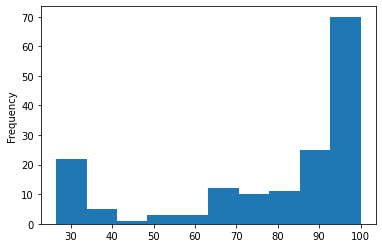

In [104]:
nulls_percent.plot.hist()

Our histogram shows we have feature columns with all sorts of different amounts of missing values, starting at ~30%. Let's just drop all of these and see how the analysis goes from here...

In [105]:
#let's now also drop columns with large amounts of nulls
thresh = len(jewish_covid_data) * .2
jewish_covid_data.dropna(thresh = thresh,axis = 1, inplace = True) 

In [106]:
jewish_covid_data.columns

Index(['qAge', 'qState', 'q1_1', 'qEthnicity_1', 'q2_1', 'q2_2', 'q2_3',
       'q2_4', 'Q3IN', 'q3r1',
       ...
       'qPOC', 'qChildren', 'qChildren2_1', 'qChildren3', 'qMarital',
       'qHHFaith', 'qOrientation_1', 'qHHIncome', 'qAbility_1', 'ALLWT'],
      dtype='object', length=157)